<a href="https://colab.research.google.com/github/sonesiji/natural-language-processing-nlp/blob/main/Sentimental_Analyisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [3]:
predefined_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

In [4]:
def clean_text(text):
    text = re.sub(r'<br />', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in predefined_stopwords])  # Remove stopwords
    return text

In [5]:
# Clean the reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Split the dataset into training and testing sets
X = df['cleaned_review']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape, X_test_tfidf.shape)

(40000, 5000) (10000, 5000)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Train the models
nb_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

# Predict the test set
y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

report_nb = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_)
report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)
report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

print(f"Naive Bayes Accuracy: {accuracy_nb}\n")
print(f"Random Forest Accuracy: {accuracy_rf}\n")
print(f"SVM Accuracy: {accuracy_svm}\n")

print(f"Naive Bayes Classification Report:\n{report_nb}\n")
print(f"Random Forest Classification Report:\n{report_rf}\n")
print(f"SVM Classification Report:\n{report_svm}\n")


Naive Bayes Accuracy: 0.855

Random Forest Accuracy: 0.8491

SVM Accuracy: 0.8867

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      4961
    positive       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

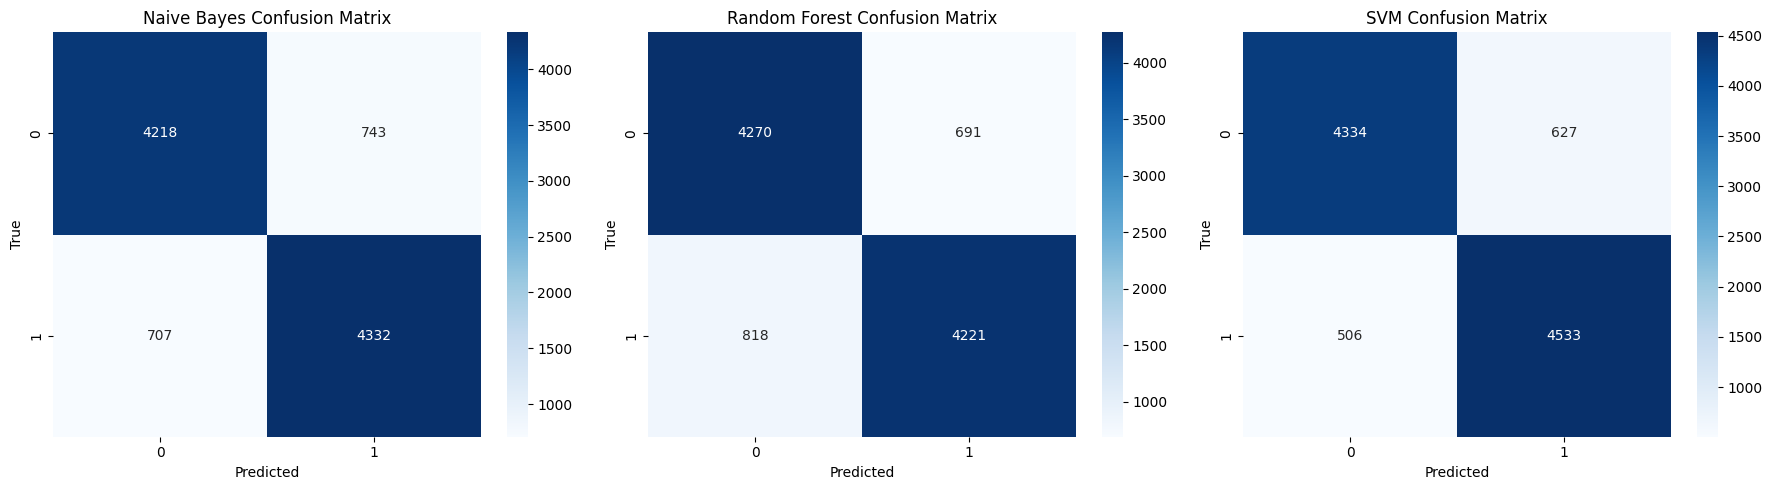

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()


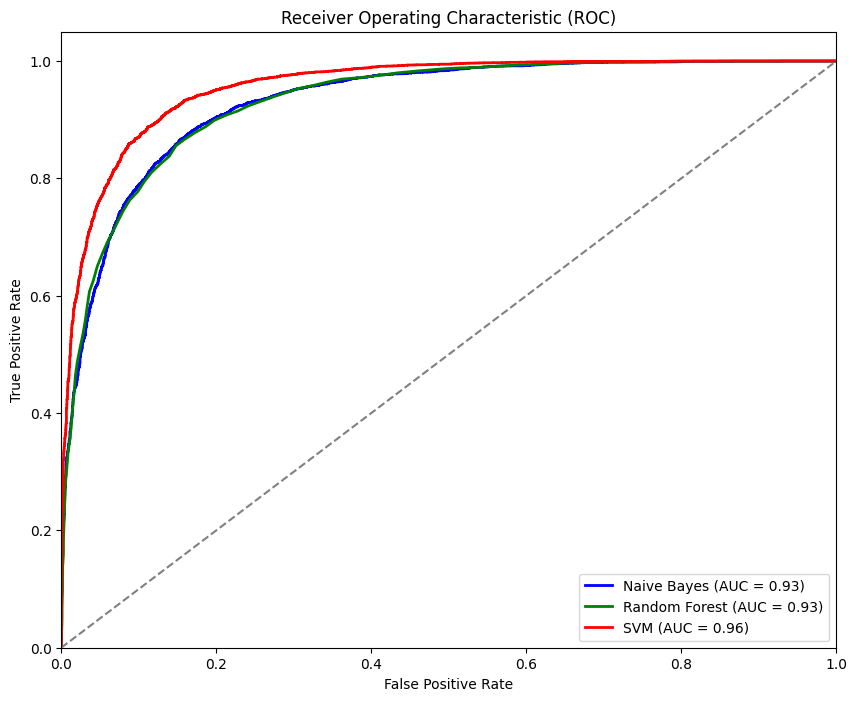

In [9]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test_tfidf))

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<ipython-input-10-5bb52a430d95>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='viridis')


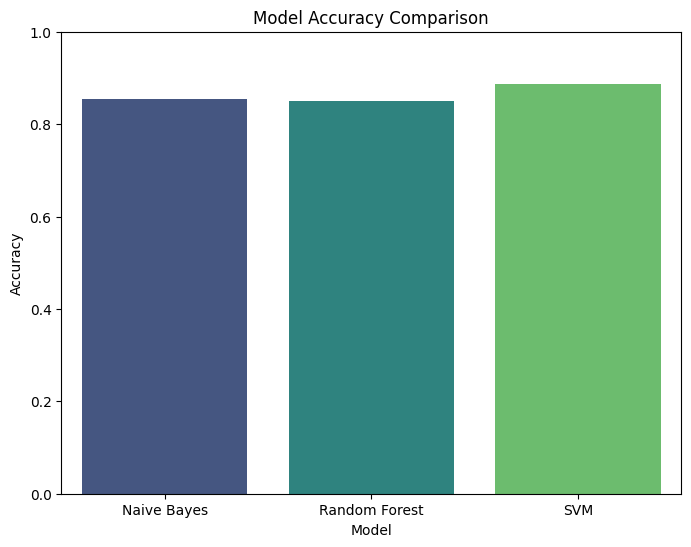

In [10]:
import pandas as pd

# Create a DataFrame for accuracy scores
accuracy_data = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_nb, accuracy_rf, accuracy_svm]
})

# Plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.show()